# GEBCO21 Bathymetry Binary File

Read GEBCO2021 global binary (or bottom topography) to regional binary format in order to run MITgcm regional model.

In [1]:
import xmitgcm

import matplotlib.pyplot as plt
import cmocean.cm as cm

## Load GEBCO21 on llc4320 grid

This bathymetry is on a lat lon grid that is the same as the model grid. We limit the bathymetry by the (XC, YC) regional grid coordinates.

*An Nguyen* already took GEBCO21 and sampled it onto llc4320 grid points globally. This was saved as **4 byte big endian float** data in a binary file. **xmitgcm** routines are used to read that data into a numpy array. 

In [2]:
meta = xmitgcm.utils.get_extra_metadata(domain='llc', nx=4320)
meta

{'has_faces': True,
 'ny': 56160,
 'nx': 4320,
 'ny_facets': [12960, 12960, 4320, 12960, 12960],
 'face_facets': [0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 4, 4, 4],
 'facet_orders': ['C', 'C', 'C', 'F', 'F'],
 'face_offsets': [0, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 2],
 'transpose_face': [False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True]}

In [3]:
data = xmitgcm.utils.read_raw_data('/scratch/atnguyen/llc4320/global/run_template/LLC_4320_bathy_wet.bin',
                                   shape = (meta['ny'], meta['nx']),
                                   dtype = np.dtype('>f'),
                                  )
data.shape = ((1,)+data.shape) #pre-append z dimension

In [4]:
def plot_llc_facets(fld,meta,saveName=None, **kwargs):
    nx=meta['nx']
    titleList = ['facet1','facet2','facet3', 'facet4','facet5']
    varFacets = [fld[0,0:3*nx,0:nx], fld[0,3*nx:6*nx,0:nx],
                 fld[0,6*nx:7*nx,0:nx],
                 np.reshape(fld[0,7*nx:10*nx,0:nx],[nx,3*nx]).T,
                 np.reshape(fld[0,10*nx:13*nx,0:nx],[nx,3*nx]).T ]
    
    fig,axs=plt.subplots(nrows=1,ncols=5, constrained_layout=True)
    
    for ax,var,title in zip(axs.flat, varFacets, titleList):
        if title == 'facet1' or title == 'facet2':
            origin='lower'
        else:
            origin=None
            
        pcm=ax.imshow(var, origin=origin, **kwargs)
        ax.title.set_text(title)
    
    fig.colorbar(pcm,ax=axs[:], location='bottom', shrink=0.8)
    
    if saveName is not None:
        plt.savefig(f'{saveName}_llcfacets12345.png', bbox_inches='tight')
    return None

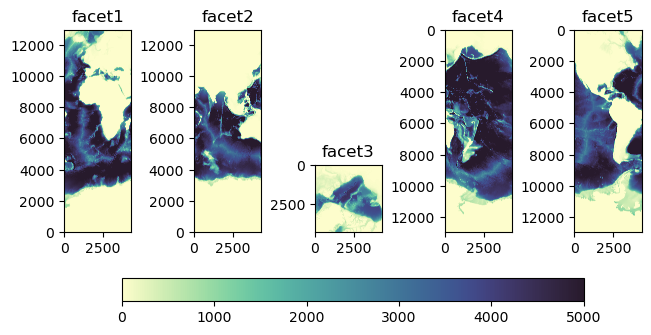

In [5]:
plot_llc_facets(data, meta, 
                cmap=cm.deep, vmin=0, vmax=5000, 
                saveName='global-llc4320')

<sub> Written by Escobar, I on February 2023 </sub>